In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

import pandas_datareader as pdr

In [2]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,30)
ticker_list = []

with open("Clean_titles.txt", "r") as f:
    for line in f:
        ticker_list.append(line[:-1])
        
data = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
  data[ticker] = yf.download(ticker, start, end)['Close']
    
data = data.dropna(axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
data.shape

(254, 171)

In [4]:
index_r = pd.read_csv("Italia_40.csv", index_col="Дата")
index_r = index_r.drop('Цена', axis=1)
index_r = index_r.drop('Макс.', axis=1)
index_r = index_r.drop('Мин.', axis=1)
index_r = index_r.drop('Объём', axis=1)
index_r = index_r.drop('Изм. %', axis=1)
index_r = index_r.reindex(index=index_r.index[::-1])
index_r["Откр."] = index_r["Откр."].apply(lambda x: x.replace(",", ""))
index_r["Откр."] = pd.to_numeric(index_r["Откр."])
index_r.head()

,Откр.
Дата,
02.01.2017,1.8740
03.01.2017,1.9241
04.01.2017,1.9209
05.01.2017,1.9102
06.01.2017,1.9195


## 1. . Выберем на рынке набор из 50 акций. Построиим эффективный фронт портфелей инвестиций без ограничений на короткие позиции и  эффективный фронт с запретом коротких позиций. Сравнить эффективные фронты и сделать выводы.  При построении эффективных фронтов вычисляем портфели с минимальным риском и отметим их на соответствующем эффективном фронте. Рассмотреть портфель  с равными долями вложения капитала и оценить, как  далек этот портфель от эффективного фронта. Тот же вопрос для индекса рынка.

In [7]:
df = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
  df[ticker] = yf.download(ticker, start, end)['Volume']
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,A2A.MI,ABT.MI,ACE.MI,AEF.MI,ADB.MI,ARN.MI,AMP.MI,ANIM.MI,ASC.MI,ATL.MI,...,TFI.MI,TB.MI,TXT.MI,UCG.MI,UNI.MI,US.MI,VLS.MI,WBD.MI,ZV.MI,ZUC.MI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+01:00,10979509,68600,80798,452371,18321,52276,408123,704682,98349,943738,...,124992,35000,51613,6738725,2853802,5979238,5901,1363312,23799,125566
2017-01-03 00:00:00+01:00,10625302,4200,88621,718412,13981,51586,730451,2101555,202374,1675025,...,258829,20000,30514,18536675,5193011,8741529,10283,1728143,47783,144770
2017-01-04 00:00:00+01:00,11785309,2800,83960,169833,16781,77628,402553,862574,108049,1263273,...,124824,7000,7732,12347196,3035637,8531844,12932,1766326,66925,45306
2017-01-05 00:00:00+01:00,8754392,0,84327,146746,11679,26572,454011,3669250,103900,2703428,...,137321,38000,43661,13300605,3159233,6786185,13817,853673,28103,35690
2017-01-06 00:00:00+01:00,6361706,12600,51664,58666,4089,24594,441504,2114155,58505,2077981,...,46932,6500,10042,11800999,3433734,5675117,2734,455999,9758,17933


я решил взять 50 активов с наибольшим обьемом торгов за все время, потому что большие объемы торгов означают, что на рынке присутствует значительное количество продавцов и покупателей, работающих с данным активом. Низкие объемы свидетельствуют об отсутствии интереса к активам, также из-за этого вероятно не получится продать или купить актив вовремя.

In [8]:
from numpy import size


volumes = dict()
for i in ticker_list:
    volumes[i] = df[i].sum()
    
sorted_dict = {}
sorted_keys = sorted(volumes, key=volumes.get)

for w in sorted_keys:
    sorted_dict[w] = volumes[w]

ticker_list_50 = list(sorted_dict.keys())[-50:]
size(ticker_list_50)

50

In [9]:
top_50 = data[ticker_list_50]
top_50.head()

,BZU.MI,BRE.MI,GEO.MI,RCS.MI,ENAV.MI,MONC.MI,IMS.MI,PRY.MI,LR.MI,ANIM.MI,...,JUVE.MI,A2A.MI,ENI.MI,RN.MI,STLA.MI,UCG.MI,BAMI.MI,ENEL.MI,TIT.MI,ISP.MI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+01:00,23.520000,12.00,2.248,0.8390,3.306,16.799999,0.3785,24.131235,0.3586,4.917725,...,0.281349,1.262,15.64,0.0333,8.917883,14.048960,2.500,4.222,0.8580,2.448
2017-01-03 00:00:00+01:00,23.020000,12.07,2.188,0.8495,3.356,16.670000,0.3770,23.541491,0.3670,4.955626,...,0.283836,1.261,15.63,0.0331,9.087179,14.069002,2.680,4.168,0.8515,2.504
2017-01-04 00:00:00+01:00,22.860001,11.83,2.158,0.8970,3.400,16.379999,0.3780,23.705847,0.3661,4.984052,...,0.286507,1.269,15.69,0.0343,9.151909,14.028919,2.720,4.174,0.8545,2.540
2017-01-05 00:00:00+01:00,22.910000,11.97,2.188,0.8995,3.402,16.340000,0.3837,23.638170,0.3875,5.197249,...,0.288717,1.265,15.64,0.0328,9.216640,14.079022,2.822,4.180,0.8425,2.558
2017-01-06 00:00:00+01:00,23.219999,12.02,2.166,0.8930,3.396,16.590000,0.3900,23.754187,0.3980,5.159347,...,0.289638,1.256,15.72,0.0341,9.858966,14.119105,2.900,4.162,0.8480,2.544


In [10]:
N = len(ticker_list_50)
n = top_50.shape[0] - 1
prices = top_50.values
prices = prices.transpose()
profitability = np.empty((N, n))

for i in range (N):
  for j in range (n):
    profitability[i][j] = math.log(prices[i][j+1]/prices[i][j])
E = np.empty(N)
vars = np.empty(N)   
 
for i in range(N):
  E[i] = statistics.mean(profitability[i])
  vars[i] = math.sqrt(statistics.variance(profitability[i]))
  
index_r_price = index_r.values.flatten()
index_r_buffer = np.empty(n-2)
for i in range(n-2):
  index_r_buffer[i] = math.log(index_r_price[i+1]/index_r_price[i])
index_r_mean = statistics.mean(index_r_buffer)
index_r_var = math.sqrt(statistics.variance(index_r_buffer))

In [11]:
profitability_ = pd.DataFrame(profitability, index=ticker_list_50)


In [12]:
def covarience_matrix(log_returns: pd.DataFrame) -> pd.DataFrame:
    cov_matrix = log_returns.transpose().cov()
    return cov_matrix


cov_matrix = covarience_matrix(profitability_.loc[ticker_list_50])

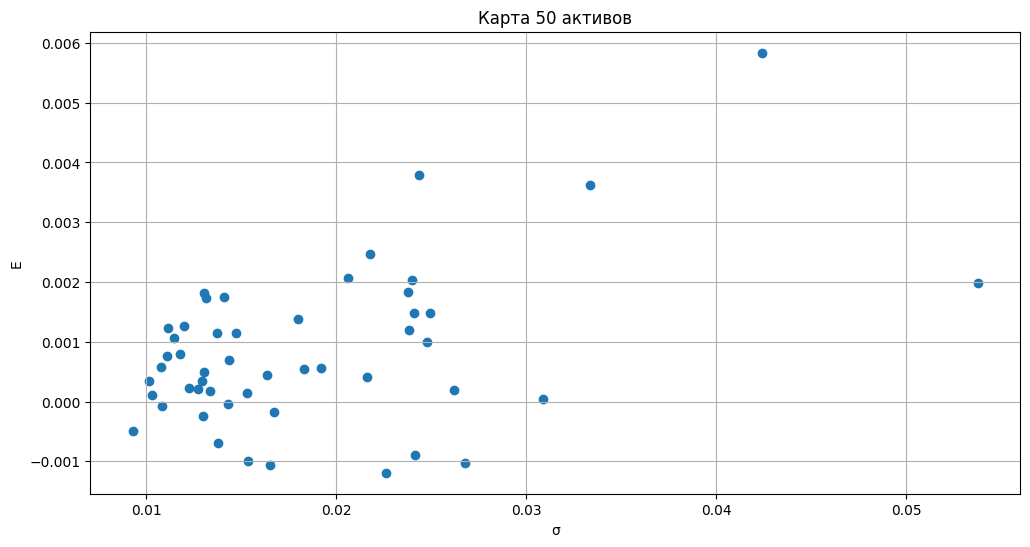

In [13]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта 50 активов")
plt.scatter(vars, E)

plt.show()

 - без ограничений на короткие позиции 

$$ \begin{cases} \sum \sum x_i x_j \sigma_{ij} \rightarrow  min \\ \sum x_i = 1 \end{cases} $$

In [14]:
from scipy.optimize import minimize

def risk_porfolio(x, cov):
  return np.sqrt(np.dot(np.dot(x, cov), x.T))
    
def risk_portfolio_max(x, cov):
  return -np.sqrt(np.dot(np.dot(x, cov), x.T))

def optimize_portfolio(mean_returns, cov_matrix, bounds, target_return=None, risk_func = risk_porfolio):
    '''оптимизатор с итеративным методом МНК SLSQP
    решает задачу мимнимизации уравнения Лагранжа''' 
    
    X = np.ones(cov_matrix.shape[0])
    X = X / X.sum()
    bounds = bounds * cov_matrix.shape[0]

    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    if target_return:
        constraints.append({'type': 'eq', 'fun': lambda X: np.dot(X, mean_returns) - target_return})
        
    out = minimize(risk_func, X, args=(cov_matrix), method='SLSQP', constraints=constraints, bounds=bounds).x
    return out


In [15]:
bounds = ((None, None),) 
x_min_risk = optimize_portfolio(E, cov_matrix, bounds)
min_risk = risk_porfolio(x_min_risk, cov_matrix)
E_mr = np.dot(x_min_risk, E) # доходноость портфеля с минимальным риском(min risk)

means_ = np.linspace(E_mr, 0.02, 50)
p_with_short = []
for m in means_:
  x = optimize_portfolio(E, cov_matrix, bounds, m)
  risk = risk_porfolio(x, cov_matrix)
  mean = np.dot(x, E)
  p_with_short.append((risk, m))
  
front_risk, front_mean = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

In [16]:
print("Портфель с минимальным риском:\n"+
      f"E - {E_mr}\n"+
      f"σ - {min_risk}")

Портфель с минимальным риском:
E - 0.000543342760214668
σ - 0.005309003303716099


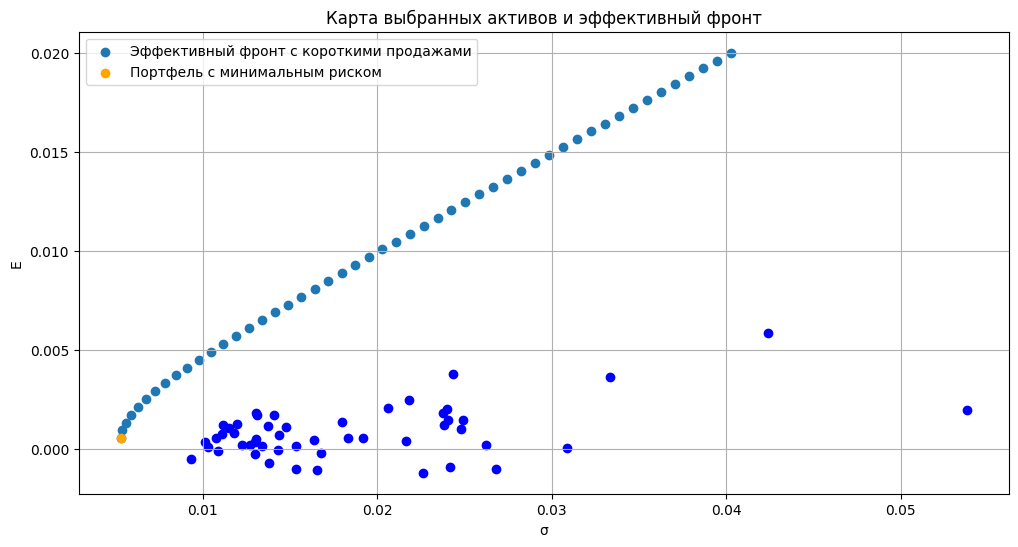

In [17]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта выбранных активов и эффективный фронт")

plt.scatter(front_risk, front_mean, label="Эффективный фронт с короткими продажами")
plt.scatter(vars, E, color="blue")
plt.scatter(min_risk, E_mr, c='orange', label="Портфель с минимальным риском")

plt.legend()
plt.show()

описание

 -  с запретом  - коротких позиций.
$$ \begin{cases} \sum \sum x_i x_j \sigma_{ij} \rightarrow  min \\ \sum x_i = 1 \\ x_i > 0 \quad \forall i\end{cases} $$

In [18]:
bounds = ((0.0, 1.0),) 

x_min_risk_ns = optimize_portfolio(E, cov_matrix, bounds)
min_risk_ns = risk_porfolio(x_min_risk_ns, cov_matrix)
mean_min_risk_ns = np.dot(x_min_risk_ns, E)

means_ns = np.linspace(mean_min_risk_ns, 0.00586, 50)
p_with_short = []
for m in means_ns:
    x = optimize_portfolio(E, cov_matrix, bounds, m)
    risk = risk_porfolio(x, cov_matrix)
    mean = np.dot(x, E)
    p_with_short.append((risk, m))

front_risk_ns, front_mean_ns = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

In [19]:
print("Портфель с минимальным риском:\n"+
      f"E - {mean_min_risk_ns}\n"+
      f"σ - {min_risk_ns}")

Портфель с минимальным риском:
E - 0.0005916527312886549
σ - 0.005899038055237787


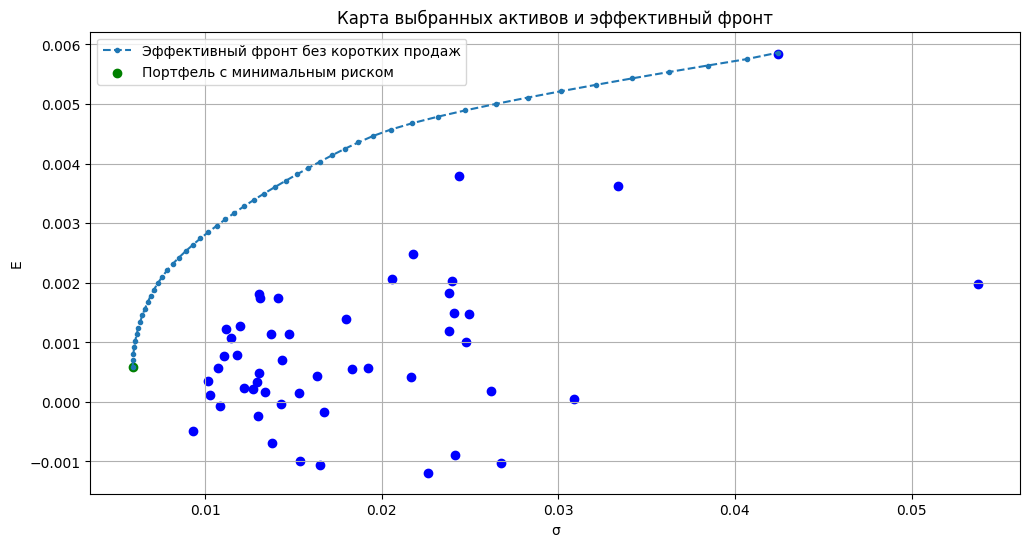

In [20]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта выбранных активов и эффективный фронт")

plt.plot(front_risk_ns, front_mean_ns,'.--', label="Эффективный фронт без коротких продаж")
plt.scatter(vars, E, color="blue")
plt.scatter(min_risk_ns, mean_min_risk_ns, c='green', label="Портфель с минимальным риском")


plt.legend()
plt.show()

In [23]:
cov = np.cov(profitability)
mean_balanced = np.mean(E)
var_balanced = math.sqrt(np.sum(cov) / (cov.shape[0] ** 2))

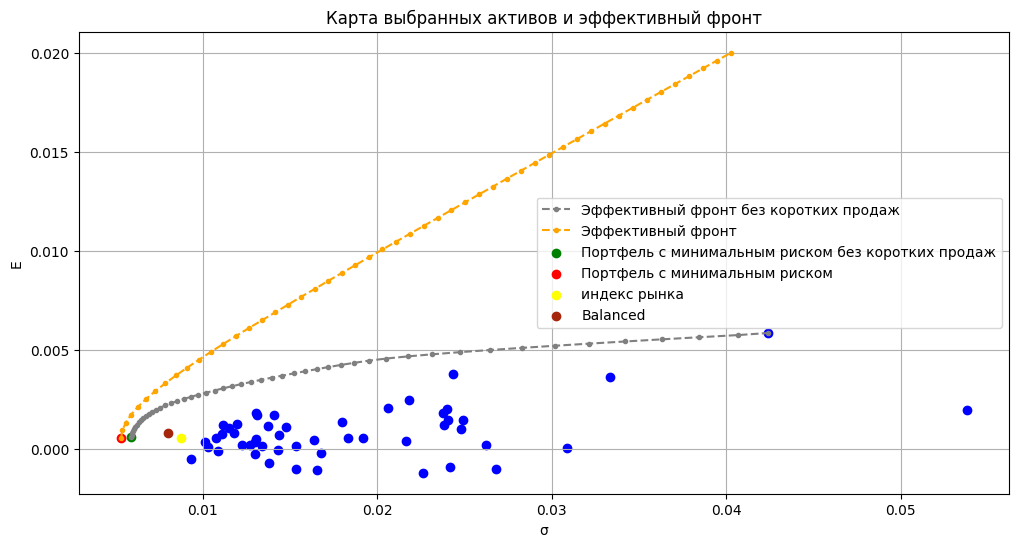

In [25]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта выбранных активов и эффективный фронт")

plt.plot(front_risk_ns, front_mean_ns,'.--',color="grey", label="Эффективный фронт без коротких продаж")
plt.plot(front_risk, front_mean,'.--', color="orange", label="Эффективный фронт")
plt.scatter(vars, E, color="blue")
plt.scatter(min_risk_ns, mean_min_risk_ns, c='green', label="Портфель с минимальным риском без коротких продаж")
plt.scatter(min_risk, E_mr, c='red', label="Портфель с минимальным риском")
plt.scatter(index_r_var, index_r_mean , c='yellow', label="индекс рынка")
plt.scatter(var_balanced, mean_balanced,color='#A5260A', label="Balanced")


plt.legend()
plt.show()

Как видно на графике эффективный фронт с запретом коротких продаж хуже эффективного фронта с короткими продажами, значит короткие продажи позволяют выбирать портфель с большей доходностью и меньшим риском. Сбалансированный портфель является наиболее выгодным, чем индекс рынка, также он находится относительно близко к эффективным фронтам, этот портфель также имеет минимальный риск среди активов.

### 2. Portfolio selection problem. Построим «хорошие» инвестиционные портфели из 10 активов вместо исходных 50 (или даже всех активов рынка). Придумаем способ выбрать 10 активов (из отобранных ранее 50) для формирования портфеля. Сравните эффективные фронты всего набора (50 акций)  и выбранного набора активов (10 акций) для двух случаев
- короткие продажи разрешены, 
- короткие продажи запрещены.


Мы решили выбрать портфели на основании отношения их средних доходностей к рискам, что немного напоимнает коэффициент Шарпа.

In [26]:
koeficient = list(E[i]/vars[i] for i in range(50))
volumes = dict()

for i in range(50):
    volumes[ticker_list_50[i]] = koeficient[i]
    
sorted_dict = {}
sorted_keys = sorted(volumes, key=volumes.get)

for w in sorted_keys:
    sorted_dict[w] = volumes[w]

ticker_list_10 = list(sorted_dict.keys())[-10:]
ticker_list_10

['STM.MI',
 'CPR.MI',
 'JUVE.MI',
 'ENAV.MI',
 'IMS.MI',
 'FBK.MI',
 'MONC.MI',
 'LR.MI',
 'IRE.MI',
 'FCT.MI']

In [27]:
top_10 = data[ticker_list_10]

In [28]:
N = len(ticker_list_10)
n = top_10.shape[0] - 1
prices = top_10.values
prices = prices.transpose()
profitability_10 = np.empty((N, n))

for i in range (N):
  for j in range (n):
    profitability_10[i][j] = math.log(prices[i][j+1]/prices[i][j])
E_10 = np.empty(N)
vars_10 = np.empty(N)   

for i in range(N):
  E_10[i] = statistics.mean(profitability_10[i])
  vars_10[i] = math.sqrt(statistics.variance(profitability_10[i]))
  
profitability_10_ = pd.DataFrame(profitability_10, index=ticker_list_10)
cov_matrix_10 = covarience_matrix(profitability_10_.loc[ticker_list_10])

In [29]:
bounds = ((None, None),) 

x_min_risk_10 = optimize_portfolio(E_10, cov_matrix_10, bounds)
min_risk_10 = risk_porfolio(x_min_risk_10, cov_matrix_10)
E_mr_10 = np.dot(x_min_risk_10, E_10) # доходноость портфеля с минимальным риском(min risk)

means_ = np.linspace(E_mr_10, 0.007, 50)
p_with_short = []
for m in means_:
  x = optimize_portfolio(E_10, cov_matrix_10, bounds, m)
  risk = risk_porfolio(x, cov_matrix_10)
  mean = np.dot(x, E_10)
  p_with_short.append((risk, m))
  
front_risk_10, front_mean_10 = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

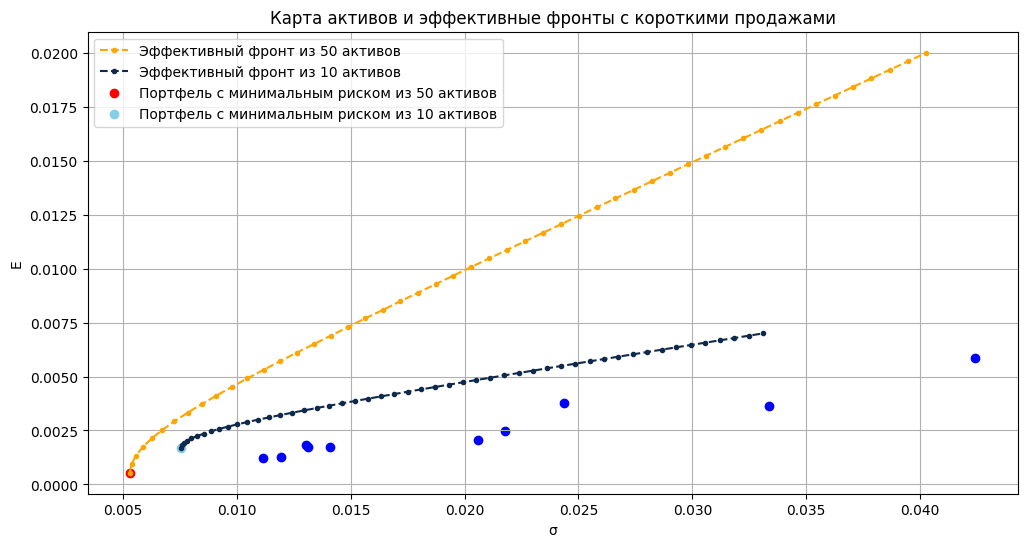

In [32]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов и эффективные фронты с короткими продажами")

plt.plot(front_risk, front_mean,'.--', color="orange", label="Эффективный фронт из 50 активов")
plt.plot(front_risk_10, front_mean_10,'.--', color="#0E294B", label="Эффективный фронт из 10 активов")
plt.scatter(vars_10, E_10, color="blue")
plt.scatter(min_risk, E_mr, c='red', label="Портфель с минимальным риском из 50 активов")
plt.scatter(min_risk_10, E_mr_10, c='#87CEEB', label="Портфель с минимальным риском из 10 активов")

plt.legend()
plt.show()

Как видно из графика эффективный фронт из 10 активов сильно проигрывает фронту из 50 активов, это говорит о том, что отброшенные 40 активов имели относительно высокое влияние на портфели из эффективного фронта. 

In [33]:
bounds = ((0.0, 1.0),) 

x_min_risk_ns_10 = optimize_portfolio(E_10, cov_matrix_10, bounds)
min_risk_ns_10 = risk_porfolio(x_min_risk_ns_10, cov_matrix_10)
mean_min_risk_ns_10 = np.dot(x_min_risk_ns_10, E_10)

means_ns = np.linspace(mean_min_risk_ns_10, 0.00586, 50)
p_with_short = []
for m in means_ns:
    x = optimize_portfolio(E_10, cov_matrix_10, bounds, m)
    risk = risk_porfolio(x, cov_matrix_10)
    mean = np.dot(x, E_10)
    p_with_short.append((risk, m))

front_risk_ns_10, front_mean_ns_10 = [p[0] for p in p_with_short], [p[1] for p in p_with_short]

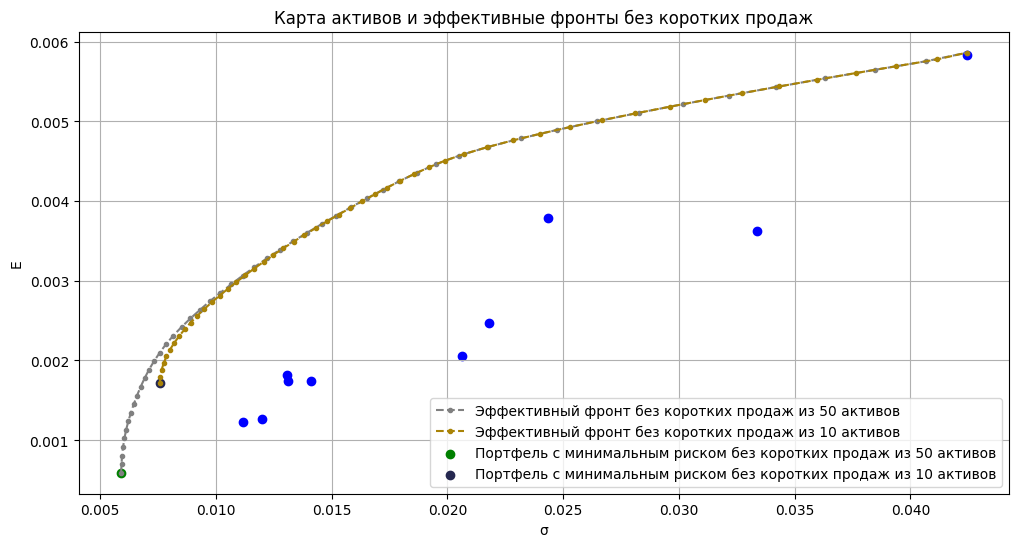

In [34]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов и эффективные фронты без коротких продаж")

plt.plot(front_risk_ns, front_mean_ns,'.--',color="grey", label="Эффективный фронт без коротких продаж из 50 активов")
plt.plot(front_risk_ns_10, front_mean_ns_10,'.--',color="#A98307", label="Эффективный фронт без коротких продаж из 10 активов")
plt.scatter(vars_10, E_10, color="blue")
plt.scatter(min_risk_ns, mean_min_risk_ns, c='green', label="Портфель с минимальным риском без коротких продаж из 50 активов")
plt.scatter(min_risk_ns_10, mean_min_risk_ns_10, c='#252850', label="Портфель с минимальным риском без коротких продаж из 10 активов")


plt.legend()
plt.show()

Без коротких продаж эффективные фронты достаточно сильно похожи а после определенной точки совпадают, это говорит о том что отброшенные 40 активов мы скорее всего брали в шорт  

### 3.  Оценю свое отношение к риску и построю свой личный оптимальный портфель инвестиций из выбранных 50 активов.  Дадим характеристику портфеля по составу и долям активов. Оценим VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.


Мы решили составить портфель, который приносит 20% годовых с минимальным риском, это позволит обогнать инфляцию а также хранить свои сбережения, при этом иметь относительно низкий риск.

In [81]:
def VaR_info(losses):
    confidence_lvl = [0.9, 0.95, 0.99]
    for alpha in confidence_lvl:
        losses = -losses
        out = losses.quantile(alpha)
        print(f' - Потери не превысят {out:.4f} с {alpha} уверенностью.')
        
target_E = 20/100/254
target_E

0.0007874015748031497

In [36]:
x_min_risk_my = optimize_portfolio(E, cov_matrix, bounds = ((None, None),), target_return=target_E)
min_risk_my = risk_porfolio(x_min_risk_my, cov_matrix)
E_mr_my = np.dot(x_min_risk_my, E)

In [37]:
x_min_risk_ns_my = optimize_portfolio(E, cov_matrix, bounds = ((0.0, 1.0),), target_return=target_E)
min_risk_ns_my = risk_porfolio(x_min_risk_ns_my, cov_matrix)
E_mr_ns_my = np.dot(x_min_risk_ns_my, E)

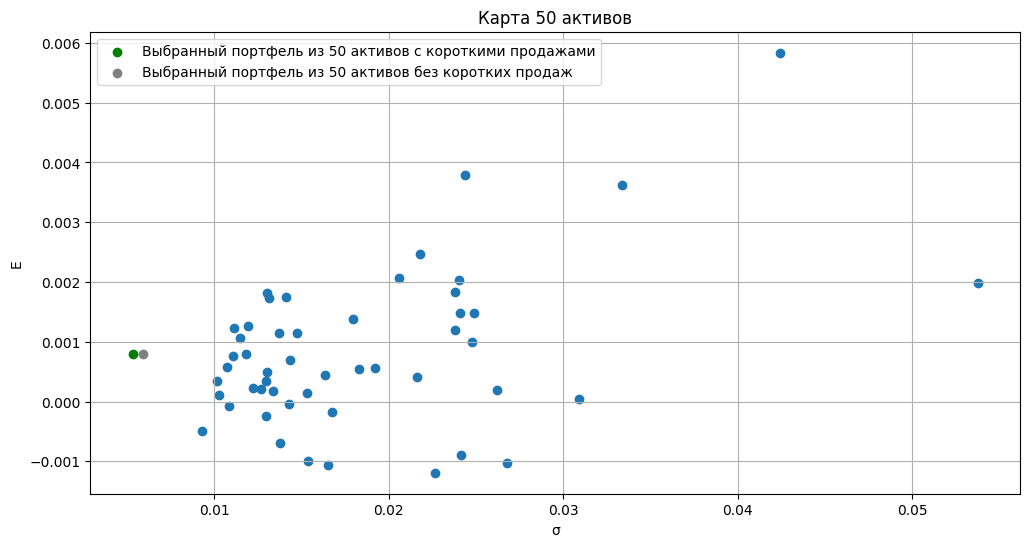

In [38]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта 50 активов")
plt.scatter(vars, E)
plt.scatter(min_risk_my, E_mr_my, c='green', label="Выбранный портфель из 50 активов с короткими продажами")
plt.scatter(min_risk_ns_my, E_mr_ns_my, c='gray', label="Выбранный портфель из 50 активов без коротких продаж")

plt.legend()
plt.show()

<Figure size 800x1400 with 0 Axes>

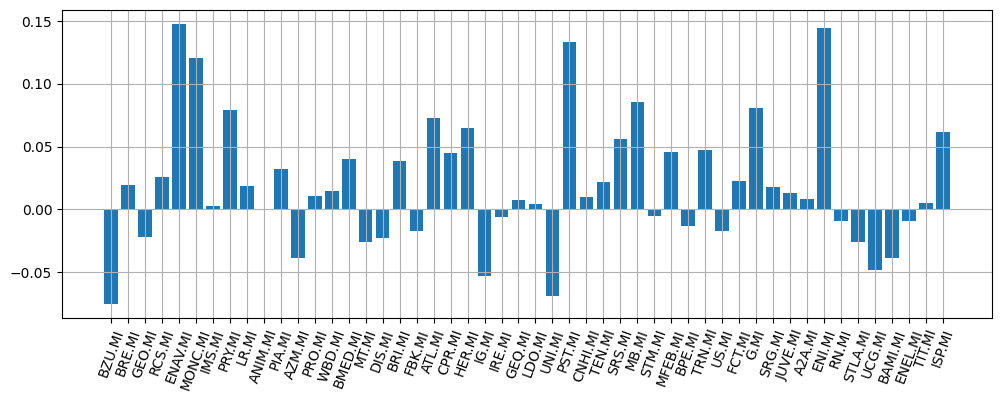

In [72]:
plt.figure(figsize=(8, 14))
x = ticker_list_50
y = x_min_risk_my

fig, ax = plt.subplots(figsize=(12, 4)) 


plt.grid()
ax.bar(x, y)
plt.xticks(rotation=70)
plt.show()

Наибольшие положительные доли занимают акции компаний ENAV, MONC, PST и ENI. 
Отрицательные доли занимают компании BZU, IG и UNI. 
Данные компании относятся к разным секторам, начиная с финансовых организаций, заканчивая сырьевыми.

<Figure size 800x400 with 0 Axes>

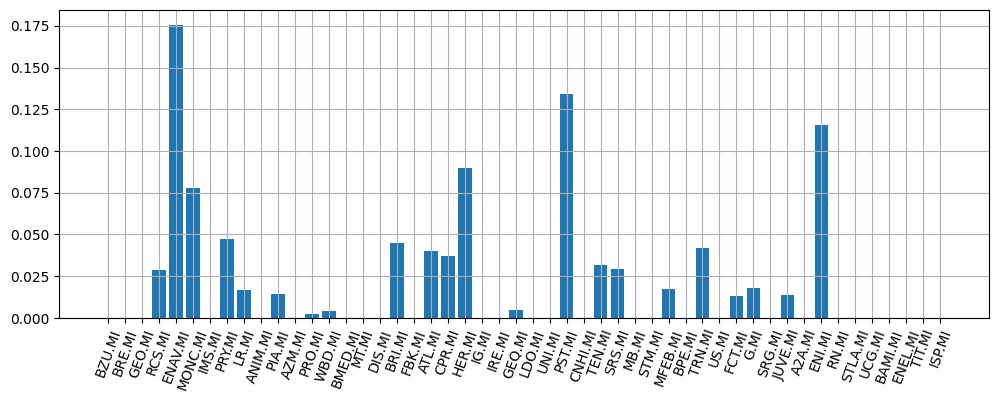

In [73]:
plt.figure(figsize=(8, 4))
x = ticker_list_50
y = x_min_risk_ns_my

fig, ax = plt.subplots(figsize=(12, 4)) 

plt.grid()
ax.bar(x, y)
plt.xticks(rotation=70)
plt.show()

Как можно заметить, по сравнению с предыдущей диаграммой, акции компаний ENAV, PST и ENI здесь также занимают лидирующие позиции, из этого можно сделать вывод что у них высокая доходность при сравнительно небольшом риске по сравнению с другими компаниями 
Также эти компании из разных секторов.

In [39]:
print("VaR's портфеля из 50 активов с короткими продажами")
VaR_info((profitability_.T * x_min_risk_my).sum(axis=1))

print("\nVaR's портфеля из 50 активов без коротких продаж")
VaR_info((profitability_.T * x_min_risk_ns_my).sum(axis=1))

VaR's портфеля из 50 активов с короткими продажами
 - Потери не превысят 0.0058 с 0.9 уверенностью.
 - Потери не превысят 0.0092 с 0.95 уверенностью.
 - Потери не превысят 0.0123 с 0.99 уверенностью.

VaR's портфеля из 50 активов без коротких продаж
 - Потери не превысят 0.0066 с 0.9 уверенностью.
 - Потери не превысят 0.0089 с 0.95 уверенностью.
 - Потери не превысят 0.0165 с 0.99 уверенностью.


### 4. . Используя выбранное  в п.3 отношение к риску построим  оптимальный портфель из 10 активов (вместо 50, см. п.2). Дадим характеристику этого портфеля по составу активов и долям инвестиций. Сравните с портфелем п.3. Оцените VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.

In [40]:
x_min_risk_my_10 = optimize_portfolio(E_10, cov_matrix_10, bounds = ((None, None),), target_return=target_E)
min_risk_my_10 = risk_porfolio(x_min_risk_my_10, cov_matrix_10)
E_mr_my_10 = np.dot(x_min_risk_my_10, E_10)

In [41]:
x_min_risk_ns_my_10 = optimize_portfolio(E_10, cov_matrix_10, bounds = ((0.0, 1.0),), target_return=target_E)
min_risk_ns_my_10 = risk_porfolio(x_min_risk_ns_my_10, cov_matrix_10)
E_mr_ns_my_10 = np.dot(x_min_risk_ns_my_10, E_10)

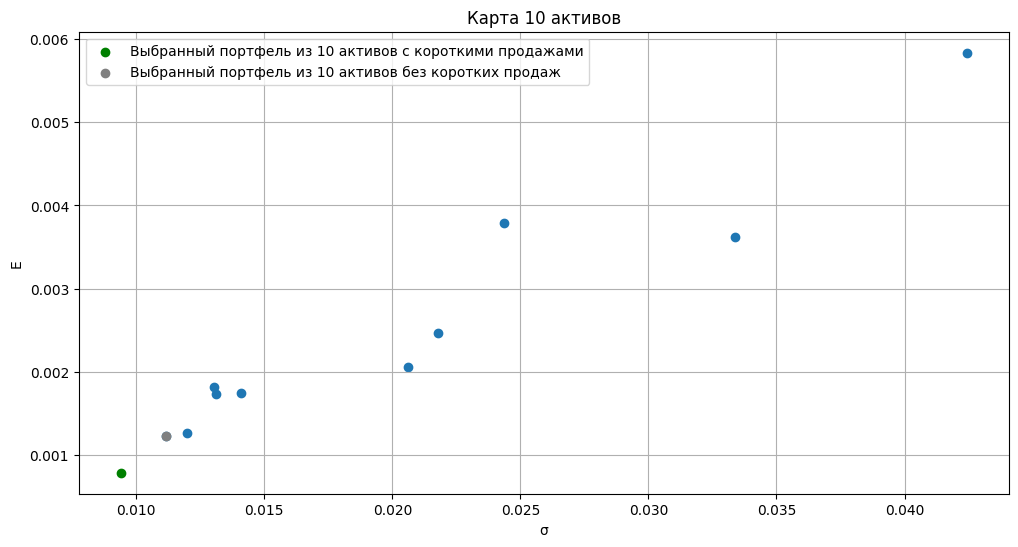

In [82]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта 10 активов")
plt.scatter(vars_10, E_10)
plt.scatter(min_risk_my_10, E_mr_my_10, c='green', label="Выбранный портфель из 10 активов с короткими продажами")
plt.scatter(min_risk_ns_my_10, E_mr_ns_my_10, c='gray', label="Выбранный портфель из 10 активов без коротких продаж")

plt.legend()
plt.show()

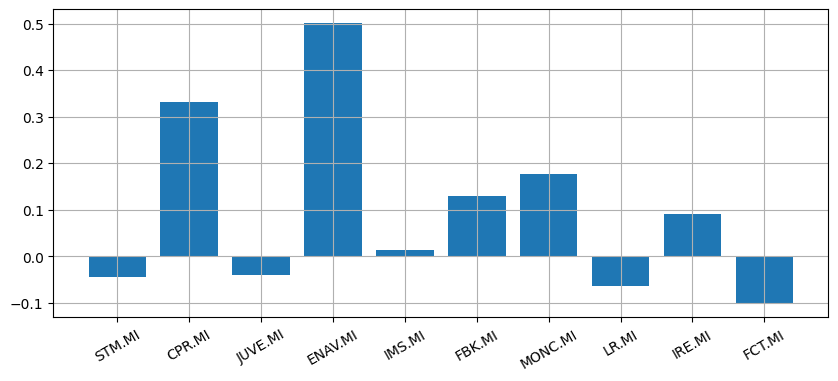

In [78]:
x = ticker_list_10
y = x_min_risk_my_10

fig, ax = plt.subplots(figsize=(10, 4)) 

plt.grid()
ax.bar(x, y)
plt.xticks(rotation=30)
plt.show()

На данной диаграмме большие доли занимают только компании CPR и ENAV, остальные имеют относительно небольшой вес. 

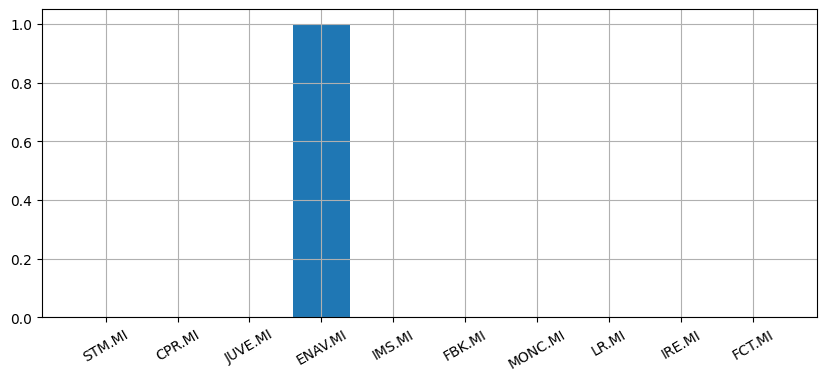

In [77]:
x = ticker_list_10
y = x_min_risk_ns_my_10

fig, ax = plt.subplots(figsize=(10, 4)) 

plt.grid()
ax.bar(x, y)
plt.xticks(rotation=30)
plt.show()

На данной диаграмме присутствует только компания ENAV, предоставляющая услуги воздушного движения и других аэронавигационных услуг в Италии.
Эта комания присутствовала во всех портфелях из-за её хорошей доходности и низкого риска. Также на карте активов можно заметить что алгоритм не смог достичь необходимой нам доходности.

Портфели можно улучшить, оставаясь в рамках 10 активов, в случае с короткими продажами нам не хватает таких активов ,как, например, PST и ENI имеющих хорошие доходности, а также BZU, IG и UNI, которые можно эффективно брать в шорт, в случае без коротких продаж нам также не хватает PST и ENI для балансировки портфеля активами с высокой доходностью. 

In [43]:
print("VaR's портфеля из 10 активов с короткими продажами")
VaR_info((profitability_10_.T * x_min_risk_my_10).sum(axis=1))

print("\nVaR's портфеля из 10 активов без коротких продаж")
VaR_info((profitability_10_.T * x_min_risk_ns_my_10).sum(axis=1))

VaR's портфеля из 10 активов с короткими продажами
 - Потери не превысят 0.0103 с 0.9 уверенностью.
 - Потери не превысят 0.0170 с 0.95 уверенностью.
 - Потери не превысят 0.0211 с 0.99 уверенностью.

VaR's портфеля из 10 активов без коротких продаж
 - Потери не превысят 0.0108 с 0.9 уверенностью.
 - Потери не превысят 0.0201 с 0.95 уверенностью.
 - Потери не превысят 0.0248 с 0.99 уверенностью.


### 5. Markowitz-Tobin model. Рассмотрим набор активов, отобранных в п.2 (10 активов).  Выберем  безрисковый актив (можно виртуальный). Построим рыночный (оптимальный)  портфель. Сделайте анализ долей активов рыночного портфеля. Оцените VaR доходностей портфеля. Рассмотрите два случая: 
- короткие продажи разрешены, 
- короткие продажи запрещены.


In [44]:
var_rf = 0
E_rf = 4/100/254
E_rf

0.00015748031496062991

In [45]:
E_10

array([0.00205909, 0.00126485, 0.00362559, 0.0012275 , 0.00247242,
       0.00174406, 0.0017383 , 0.00583646, 0.0018162 , 0.00378937])

In [46]:
from scipy import optimize
def objective_function(x, cov_matrix, mean_vector, risk_free_mean = E_rf):
    f = float(-(x.dot(mean_vector) - risk_free_mean) / np.sqrt(np.dot(np.dot(x, cov_matrix), x.T)))
    return f

def optimize_portfolio_MT(risk_free_mean, N, cov_matrix,returns,bounds):
    X = np.ones(N)
    X = X / X.sum()
    bounds = bounds * N
    constraints=[]
    constraints.append({'type': 'eq', 'fun': lambda X: np.sum(X) - 1.0})
    minimize = optimize.minimize(objective_function, X,
                    args=(cov_matrix, returns, risk_free_mean,), method='SLSQP',
                    constraints=constraints,
                    bounds=bounds).x
    return minimize


bounds = ((None, None),)

x_MT = optimize_portfolio_MT(E_rf, 10, cov_matrix_10, E_10, bounds)
vars_MT = risk_porfolio(x_MT, cov_matrix_10)
E_MT = np.dot(x_MT, E_10)


 - без ограничений на короткие позиции 

$$ \begin{cases} \frac{E(x) - E_{free}}{\sigma(x)} \rightarrow  max \\ \sum x_i = 1 \end{cases} $$

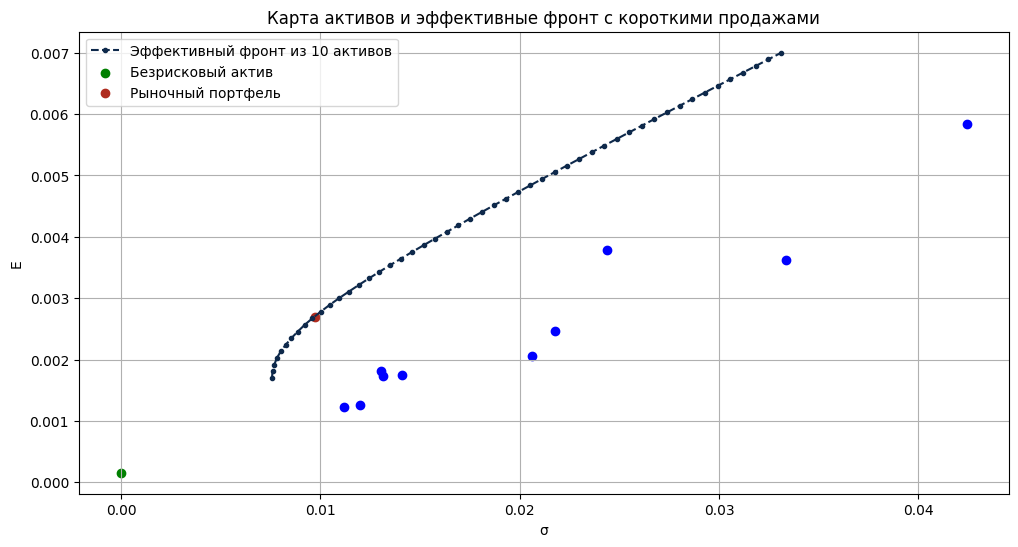

In [47]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов и эффективные фронт с короткими продажами")

plt.plot(front_risk_10, front_mean_10,'.--', color="#0E294B", label="Эффективный фронт из 10 активов")
plt.scatter(vars_10, E_10, color="blue")
plt.scatter(var_rf, E_rf, c='green', label="Безрисковый актив")
plt.scatter(vars_MT, E_MT, c='#AF2B1E', label="Рыночный портфель")

plt.legend()
plt.show()

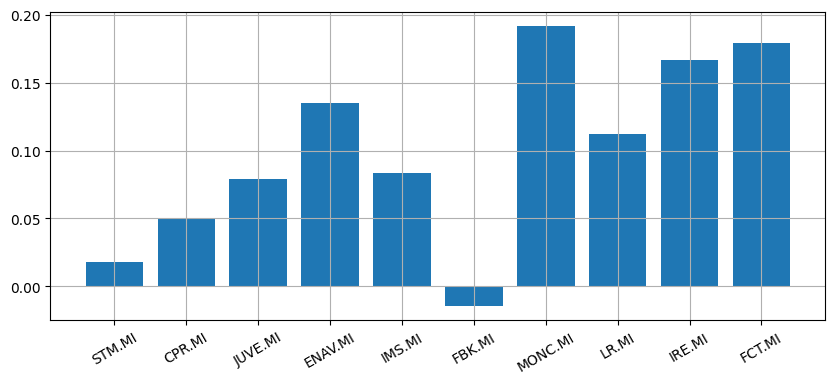

In [79]:
x = ticker_list_10
y = x_MT

fig, ax = plt.subplots(figsize=(10, 4)) 

plt.grid()
ax.bar(x, y)
plt.xticks(rotation=30)
plt.show()

На графике можно заметить что распределение средсв по активам достаточно равномерное, также представленные компании находятся в разных секторах экономики, поэтому они меньше коррелируют между собой.

In [49]:
bounds = ((0, 1),)

x_MT_ns = optimize_portfolio_MT(E_rf, 10, cov_matrix_10, E_10, bounds)
vars_MT_ns = risk_porfolio(x_MT, cov_matrix_10)
E_MT_ns = np.dot(x_MT, E_10)

-  с запретом  - коротких позиций.

$$ \begin{cases} \frac{E(x) - E_{free}}{\sigma(x)} \rightarrow  max \\ \sum x_i = 1  \\ x_i > 0 \quad \forall x_i\end{cases} $$

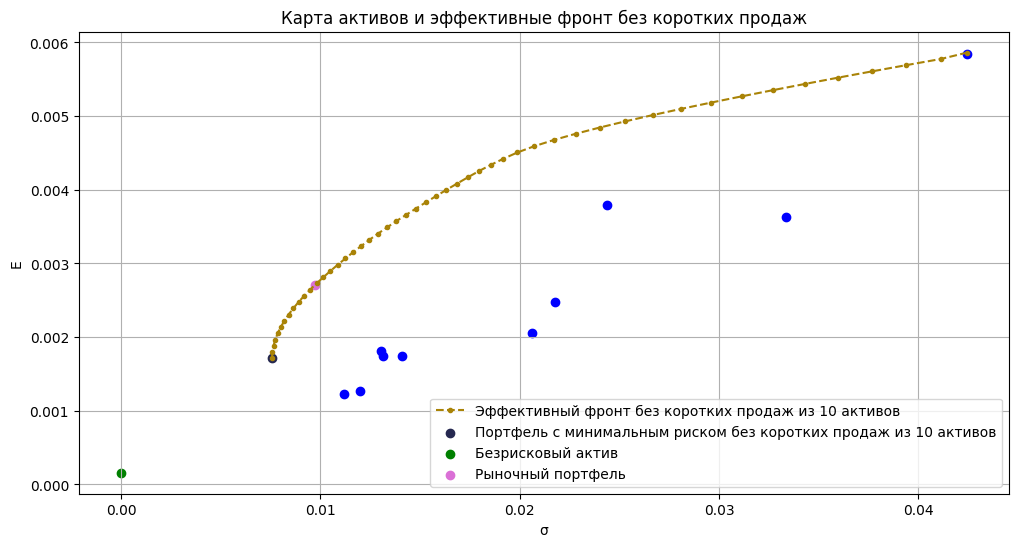

In [50]:
plt.figure(figsize=(12, 6))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов и эффективные фронт без коротких продаж")

plt.plot(front_risk_ns_10, front_mean_ns_10,'.--',color="#A98307", label="Эффективный фронт без коротких продаж из 10 активов")
plt.scatter(vars_10, E_10, color="blue")
plt.scatter(min_risk_ns_10, mean_min_risk_ns_10, c='#252850', label="Портфель с минимальным риском без коротких продаж из 10 активов")
plt.scatter(var_rf, E_rf, c='green', label="Безрисковый актив")
plt.scatter(vars_MT_ns, E_MT_ns, c='#DA70D6', label="Рыночный портфель")

plt.legend()
plt.show()

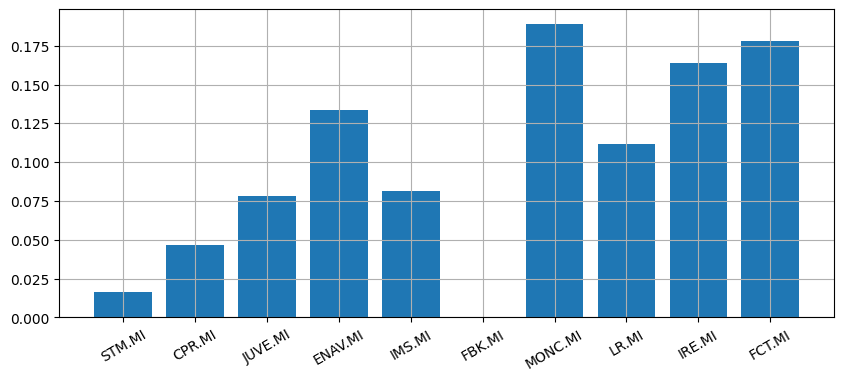

In [80]:
x = ticker_list_10
y = x_MT_ns

fig, ax = plt.subplots(figsize=(10, 4)) 

plt.grid()
ax.bar(x, y)
plt.xticks(rotation=30)
plt.show()

Данная диограмма почти не отличается от предидущей, за исключением компании FBK, которую в прошлом случае мы брали в шорт.

In [52]:
print("Оптимальный портфель с короткими продажами")
VaR_info((profitability_10_.T * x_MT).sum(axis=1))

Оптимальный портфель с короткими продажами
 - Потери не превысят 0.0081 с 0.9 уверенностью.
 - Потери не превысят 0.0171 с 0.95 уверенностью.
 - Потери не превысят 0.0231 с 0.99 уверенностью.


In [53]:
print("Оптимальный портфель без коротких продаж")
VaR_info((profitability_10_.T * x_MT_ns).sum(axis=1))

Оптимальный портфель без коротких продаж
 - Потери не превысят 0.0081 с 0.9 уверенностью.
 - Потери не превысят 0.0169 с 0.95 уверенностью.
 - Потери не превысят 0.0231 с 0.99 уверенностью.
